In [1]:
# general libs 
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pandas import IndexSlice as idx
from keras.utils.vis_utils import plot_model
import importlib
import matplotlib.pyplot as plt

# own libs
import Q_learning as Ql
import create_Q_models 
import test_algorithms as test

seed=5 

In [3]:
W = 32
#optional activation_func='selu'
model = create_Q_models.Q_model(W,W,seed,depth=1,N_actions=2)
model = model.Q_model_setup(include_CNN=1, include_LSTM=1,time_steps=W, MIDQN=1)

target = create_Q_models.Q_model(W,W,seed,depth=1,N_actions=2)
target = target.Q_model_setup(include_CNN=1,include_LSTM=1,time_steps=W, MIDQN=1)

target.summary()


In [5]:
#training the model
Max_iter = 5*10**6              #max training iterations
B = 10                          #parameter update interval
C = 1000                        #target parameter update
eps_min = 0.1                   #minimal value for epsilon
eps_start = 10**(-5/(Max_iter)) # starting value of epsilon
M_min= 2000                     #min needed memories needed in buffer
M = 2000                        #memory buffer capacity
P = 0.02                        #transaction penalty 

#Set hyperparamers
batch_size=124              #batch size
Gamma = 0.9                 #discount factor
learning_rate = 0.00001     # or 1/np.sqrt(N_actions)

#additional binary parameters
timeframe=W

In [6]:
#setting up learning enviroment and the agent
Agent = Ql.Q_learning(model,target,  batch_size, Max_iter, learning_rate,
           eps_min, Gamma, B, C, P, M, M_min, eps_start,seed,timeframe=timeframe) 
training = Agent.Q_train(QL=2, CNN_branch=1, LSTM_branch=1, img='binary')

#saving loss and reward of training data
np.savetxt( r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\loss.csv', training[0])
np.savetxt( r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\reward.csv', training[1])

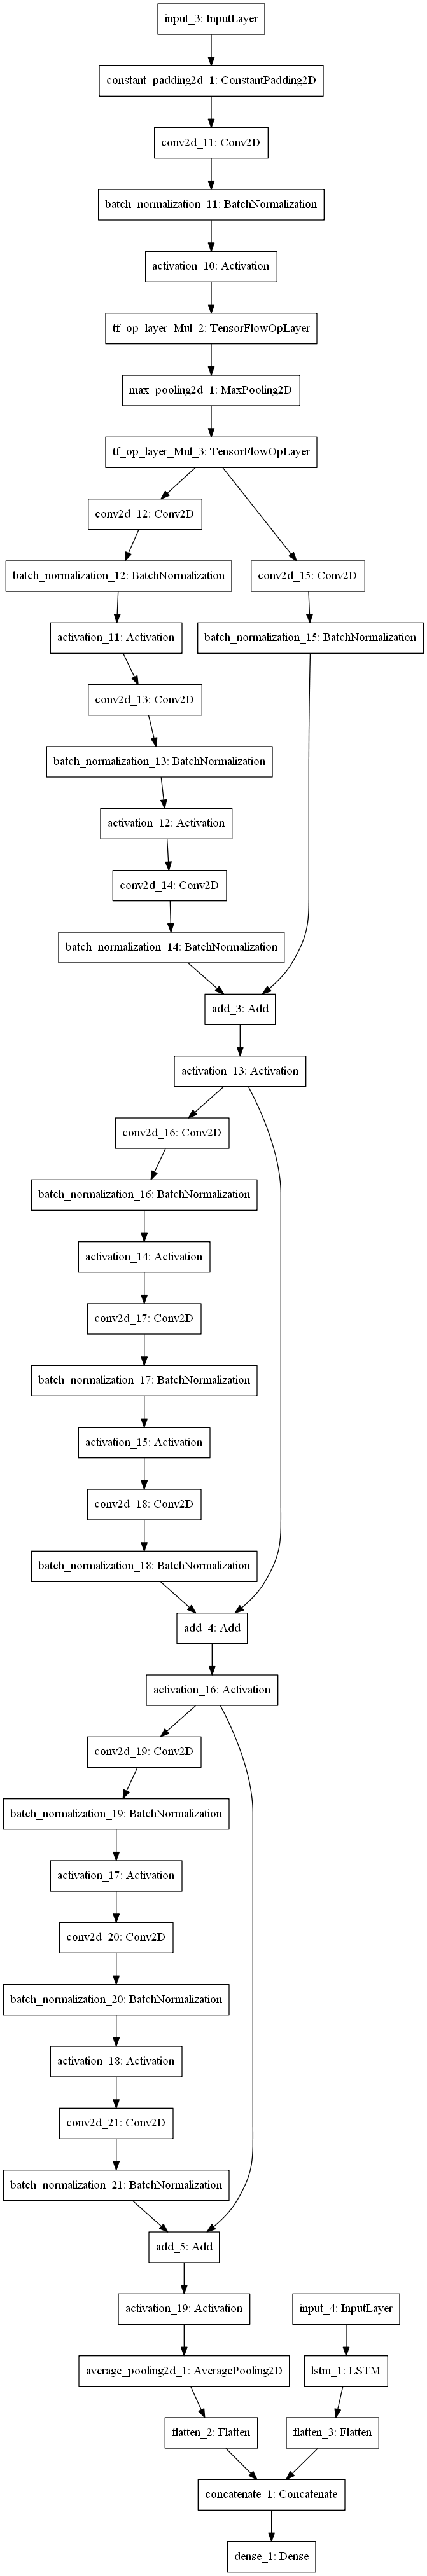

In [8]:

import tensorflow as tf

#load the trained model
model = tf.keras.models.load_model(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models')
tf.keras.utils.plot_model(model)

In [3]:
#set up test enviroment
test_inv = test.test_model(model,images_directory=r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Data\binary_colour_scheme.32frames')

# run predictions over the test period
profit, longs, shorts=test_inv.K_top_bottom(MIDQN=1)

#save predictions 
np.savetxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\test_profit.csv', profit)
np.savetxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\test_longs.csv', longs)
np.savetxt(r'D:\1 - School\Econometrics\2020 - 2021\Scriptie\Explainable AI\Scripts\Models\test_shorts.csv', shorts)

10 out of 523 loops done. Current profit:-0.0951826395376445
20 out of 523 loops done. Current profit:-0.0221257710199958
30 out of 523 loops done. Current profit:0.454413352399599
40 out of 523 loops done. Current profit:1.1300733624710295
50 out of 523 loops done. Current profit:0.7530785754989702
60 out of 523 loops done. Current profit:0.7983754026057643
70 out of 523 loops done. Current profit:0.7018743604451645
80 out of 523 loops done. Current profit:0.5498744760760088
90 out of 523 loops done. Current profit:0.3440125798694553
100 out of 523 loops done. Current profit:0.19087501350809744
110 out of 523 loops done. Current profit:0.3099618866655347
120 out of 523 loops done. Current profit:0.08012863552896787
130 out of 523 loops done. Current profit:-0.10075744773293671
140 out of 523 loops done. Current profit:0.18466010160095658
150 out of 523 loops done. Current profit:0.09414544826434534
160 out of 523 loops done. Current profit:0.2564774409214743
170 out of 523 loops done.